In [29]:
import cv2 
import numpy as np

back = cv2.imread('b.jpg',1)
logo = cv2.imread('daum.png',1)
logo_black = logo.copy()
logo_white = logo.copy()


h,w,_ = logo.shape

roi = back[150:150+h,150:150+w]


new_roi1 = cv2.add(roi,logo)
new_roi2 = cv2.add(roi,logo_black)
new_roi3 = cv2.add(roi,logo_white)
#로고 바탕을 검정색으로 
logo_black[logo_black[:]==255]=0

logo_white[logo_white[:]==255]=0
logo_white[logo_white[:]!=0]=255



#
mask = cv2.cvtColor(logo_black,cv2.COLOR_BGR2GRAY)

# 로고 바탕은 검정색으로 로고 형태는 흰색으로
mask[mask[:] !=0] =255

#바탕에 넣을수 있게 자리를 만들어주기 위해서
# 로고 형태자리만 바탕에서 검정색으로 자리만 만들어줌

mask_inv = cv2.bitwise_not(mask)

#비트연산 블랙=0 화이트>0 
roi_mask1 = cv2.bitwise_and(logo,logo,mask=mask)


roi_mask2 = cv2.bitwise_and(roi,roi,mask=mask_inv)



roi_final = cv2.add(roi_mask1,roi_mask2)


cv2.imshow('roi_final',roi_final)

cv2.imshow('roi_mask2',roi_mask2)
cv2.imshow('roi_mask1',roi_mask1)


cv2.imshow('mask',mask)
cv2.imshow('mask_inv',mask_inv)
# cv2.imshow('new_roi3',new_roi3)
# cv2.imshow('new_roi2',new_roi2)
# cv2.imshow('logo_white',logo_white)
cv2.imshow('logo_black',logo_black)

# cv2.imshow('new_roi1',new_roi1)
cv2.imshow('logo',logo)
cv2.imshow('roi',roi)




#백그라운드에다가 로고 삽입


back[150:150+h,150:150+w] = roi_final

cv2.imshow('background',back)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
img = cv2.imread('b.jpg',1)

img2 = img+100
img3 = img-100



cv2.imshow('img',img2)
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

<포화연산>  
  
색상 값은 0-255사이의 값을 갖지만 +, - 연산을 수행하면 이 범위를 벗어나는 값을 만들기도 한다. 그런데 이미지 값의 타입은 uint8이므로 256을 0이 되므로 흰색이 검정색으로 변경된다. 이렇게 처리되면 아주 밝은 부분이 아주 어둡게, 또는 아주 어두운 부분이 아주 밝게 반대로 표현되어 이미지가 변질된다. 이를 위해서 포화연산을 처리해주어야 함  
  
포화연산 : 픽셀값이 255를 넘으면 255로, 0 미만이면 0으로 처리하는 연산    
  
함수: np.clip(src, 최소값, 최대값)  
=> 배열 src 요소중 최소값보다 작은 것은 모두 최소값으로, 최대값보다 큰 값은 모두 최대값으로 대체해줌

In [33]:
img.shape

(410, 640, 3)

In [39]:
img2

array([[[ 56,  55,  65],
        [ 52,  51,  61],
        [ 56,  53,  62],
        ...,
        [225, 195, 176],
        [223, 196, 176],
        [223, 196, 176]],

       [[ 56,  55,  65],
        [ 57,  56,  66],
        [ 68,  64,  75],
        ...,
        [228, 198, 179],
        [227, 197, 178],
        [225, 198, 178]],

       [[ 73,  73,  85],
        [ 71,  72,  82],
        [ 84,  83,  93],
        ...,
        [229, 199, 180],
        [228, 198, 179],
        [228, 198, 179]],

       ...,

       [[119, 154, 167],
        [100, 135, 148],
        [100, 131, 141],
        ...,
        [114, 153, 185],
        [125, 161, 191],
        [118, 155, 183]],

       [[115, 153, 165],
        [123, 158, 171],
        [100, 131, 141],
        ...,
        [152, 193, 226],
        [142, 180, 212],
        [138, 176, 206]],

       [[123, 161, 173],
        [129, 167, 179],
        [104, 139, 149],
        ...,
        [140, 180, 215],
        [135, 173, 207],
        [136, 174, 206]]

In [32]:
import numpy as np

def saturate_bright(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+num, 0, 255)
    pic = pic.astype('uint8')
    return pic

def saturate_dark(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic-num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [40]:
img2 = saturate_bright(img,100)
img3= saturate_dark(img,100)
cv2.imshow('img',img)
cv2.imshow('img2',img2)
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

<이미지 명암비 조절>  
명암비란 이미지의 밝은 부분과 어두운 부분의 밝기 차를 의미.  
명암비 조절은 이미지의 밝은 부분은 더 밝게, 이미지의 어두운 부분은 더 어둡게 함으로써 이미지 윤곽을 뚜렷하게 처리하므로 활용도 높음

In [42]:
def saturate_contrast1(p, num):
    pic = p.copy()
    pic = pic.astype('int64')
    pic = np.clip(pic*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [43]:

img4 =saturate_contrast1(img,0.5) 

img5 =saturate_contrast1(img,2)

cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

*명암비 효율적 조절 - 픽셀 중간값인 128을 기준으로 이 보다 큰 값은 더 밝게 만들고 128보다 작은 값은 더 어둡게 만듦으로써 대비를 크게 함  
  
dst(x, y) = src(x, y) + (src(x, y)-128)*alpha

In [44]:
def saturate_contrast2(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+(pic-128)*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [46]:

img4 = saturate_contrast2(img,-0.5)
img5 = saturate_contrast2(img,)


cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

<히스토그램 분석>  
영상 픽셀 밝기 분포를 분석하여 밝기, 명암비 조절  
  
* cv2.calcHist(img,channel,mask,histSize,range)  
img: 이미지 배열  
channel: 분석할 칼라  
mask: 분석할 영역. None이면 이미지 전체  
histSize: 히스토그램 크기. x축 값 개수  
range: x축 값 범위

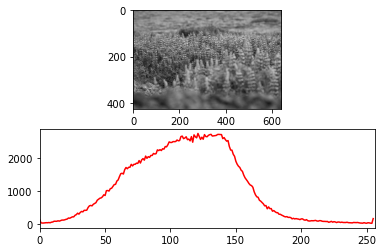

In [51]:
import cv2 
import matplotlib.pyplot as plt
img = cv2.imread('a.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img,'gray')
plt.subplot(2,1,2), plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

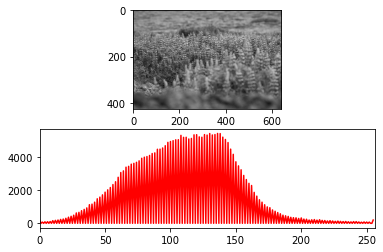

In [56]:
img5 = saturate_contrast2(img, -0.5)
f_max = img5.max()
f_min = img5.min()
nframe = img5.astype('int64')
img6 = np.clip((nframe-f_min)*255/(f_max-f_min), 0,255).astype('uint8')
hist = cv2.calcHist([img6],[0],None,[256],[0,256])
plt.subplot(2,1,1), plt.imshow(img6,'gray')
plt.subplot(2,1,2), plt.plot(hist, color='r')
plt.xlim([0,256])
plt.show()

히스토그램 스트레칭은 분포도를 넓혀주지만 픽셀값의 평준화는 해주지 않는다 히스토그램 평활화는 그래프에서 너무 돌출되는 부분을 깍아주어 평준화해준다  
  
dst(x, y) = round((누적합(src(x, y))*픽셀최대값)/픽셀누적최대값-최소값) 

In [57]:
# 
a = np.array([1,2,3,4,5])
b = np.array([[0,3],[1,4]])
a[b]

array([[1, 4],
       [2, 5]])

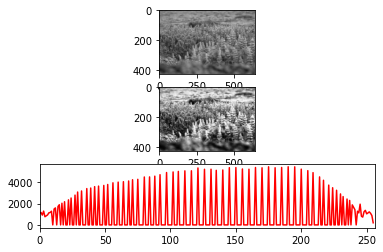

In [59]:
hist, bins = np.histogram(img5.flatten(), 256, [0,256])

# 누적합, 각 빈의 누적함 계산 
cdf = hist.cumsum()

#속도개선을 위해 0인 부분 제외
cdf_m = np.ma.masked_equal(cdf,0)

# 히스토그램 평활화
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max()-cdf_m.min())

# Mask 처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

#img5의 값이 cdf배열의 인덱스로 사용됨
#cdf는 히스토그램 평활화된 값이 저장되어 있으므로 
# img5[12][10]칸의 픽셀값이 125이면 cdf[125] 


img7 = cdf[img5]



hist = cv2.calcHist([img7],[0],None,[256],[0,256])
plt.subplot(3,1,1),plt.imshow(img5,'gray')
plt.subplot(3,1,2),plt.imshow(img7,'gray')
plt.subplot(3,1,3),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()


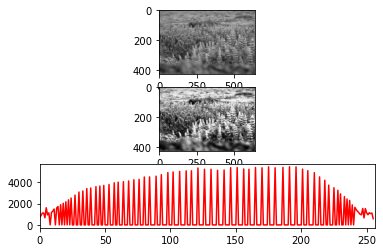

In [60]:
img8 = cv2.equalizeHist(img5)
hist = cv2.calcHist([img8],[0],None,[256],[0,256])

plt.subplot(3,1,1),plt.imshow(img5,'gray')
plt.subplot(3,1,2),plt.imshow(img8,'gray')
plt.subplot(3,1,3),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

비트연산

In [ ]:

img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')

# 검은색=0 흰색=255 , 0 and 1
#  0 검정색 같으면 흰색 
# 공통점이 없을떈 0 , 있으면 있는걸로
img3 = cv2.bitwise_and(img1,img2)

# or 이므로 우선순위 하얀거 / >0
img4 = cv2.bitwise_or(img1,img2)


cv2.imshow('img1',img1)
cv2.imshow('img2',img2)
# cv2.imshow('img3',img3)
cv2.imshow('img4',img4)

cv2.waitKey(0)
cv2.destroyAllWindows()